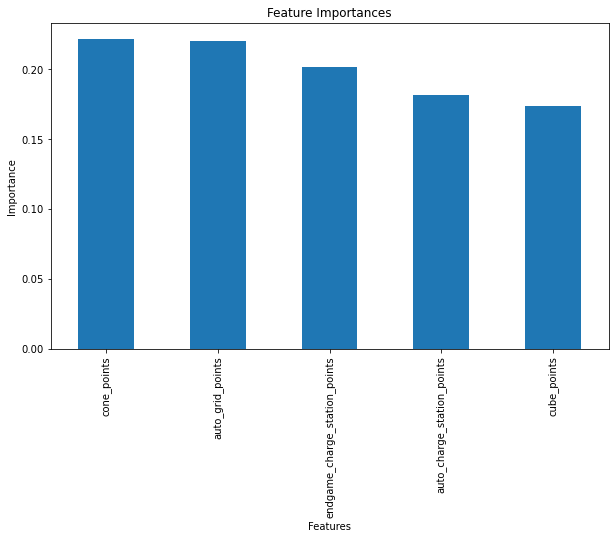

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Load your data
df = pd.read_csv("../../data/frc_data/data_2.csv")  # Replace with your actual data file
df.drop('team', inplace=True, axis=1)

# Prepare your feature matrix X and target vector y
X = df.drop('rank', axis=1)
y = df['rank']
weights = 1 / y  # Weights inverse of rank

# Define the cross-validation parameters
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an array to store feature importances
feature_importances = np.zeros(X.shape[1])

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Loop over each fold in the cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    weights_train, weights_test = weights.iloc[train_index], weights.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train, sample_weight=weights_train)

    # Update the feature importances
    feature_importances += model.feature_importances_

# Average the feature importances over all folds
feature_importances /= kf.get_n_splits()

# Get the feature names
feature_names = X.columns.tolist()

# Create a pandas Series with the feature importances
importances = pd.Series(feature_importances, index=feature_names)

auto_csp_mult = importances.get('auto_charge_station_points')
auto_gp_mult = importances.get('auto_grid_points')
cup_mult = importances.get('cube_points')
cop_mult = importances.get('cone_points')
eg_mult = importances.get('endgame_charge_station_points')

sorted_importances = importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [3]:
import numpy as np
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("../../data/frc_data/joh_mil_cur_arc_new.csv")

scores = {}
count = 0
for x in df['team']:
    
    scores[x] = (auto_csp_mult * df['norm_a_c_s_p'][count]) + (auto_gp_mult * df['norm_a_g_p'][count]) + (cup_mult * df['norm_c_p'][count]) + (cop_mult * df['norm_co_p'][count]) + (eg_mult * df['norm_eg_p'][count])
    count += 1

{k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}


{2056: 0.8162096010321084,
 254: 0.7972201595322874,
 5940: 0.7928345368515679,
 111: 0.77810576440998,
 6329: 0.776796056633948,
 2468: 0.7674366987138078,
 930: 0.7455203373002097,
 4028: 0.7413899809200107,
 4522: 0.740557584991714,
 118: 0.7359646952970064,
 3538: 0.7354248317729135,
 6036: 0.7325681678783962,
 2075: 0.7305346575201626,
 6328: 0.7242453304935692,
 176: 0.7227695483040113,
 4143: 0.7166816102309692,
 6090: 0.712915519424577,
 2521: 0.7093158154749725,
 1619: 0.7066838764119459,
 3175: 0.7035142344737804,
 3218: 0.6998275988693645,
 624: 0.6994413702283783,
 4499: 0.6986902510416849,
 2539: 0.6981947130074645,
 1868: 0.6961050218687784,
 1756: 0.694234880766713,
 494: 0.6913509586016541,
 1577: 0.6881619247882033,
 1771: 0.6837766061067072,
 4039: 0.6831548044639888,
 195: 0.6802001426902574,
 1391: 0.679680046237596,
 70: 0.6755246866003736,
 1538: 0.6727317270015398,
 1683: 0.6718942842505924,
 973: 0.6689083573259669,
 359: 0.6687576171145827,
 3039: 0.66796500152

In [5]:
red_team, blue_team, won = [], [], []

jqd = pd.read_csv("../../data/frc_data/all_qual_data.csv")

iterate = 0

for l in range(len(jqd['red_1'])):

    red_team.append(scores[jqd["red_1"][iterate]] + scores[jqd["red_2"][iterate]] + scores[jqd["red_3"][iterate]])
    blue_team.append(scores[jqd["blue_1"][iterate]] + scores[jqd["blue_2"][iterate]] + scores[jqd["blue_3"][iterate]])
    if(jqd['win'][iterate] == "blue"):
        won.append(1)
    else:
        won.append(0)
    
    iterate += 1

feature_data = pd.DataFrame({
    'red_team': red_team,
    'blue_team': blue_team
})

# Create a Series for the target data
target_data = pd.Series(won, name='target')

# Combine into one DataFrame if needed
combined_data = feature_data.assign(target=target_data)

# Now combined_data is a DataFrame ready for use in machine learning
print(combined_data)


     red_team  blue_team  target
0    1.973344   1.839480       1
1    1.973344   1.839480       0
2    1.973344   1.839480       0
3    1.488303   1.511743       1
4    1.665338   1.179118       0
..        ...        ...     ...
721  1.879823   1.792376       0
722  1.824897   1.756163       1
723  2.026918   1.925818       1
724  1.706678   1.841128       1
725  2.026918   1.756163       0

[726 rows x 3 columns]


In [6]:
X = feature_data
y = combined_data['target']

combined_data['target'].value_counts()
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.25, random_state=0)

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

model = LogisticRegression()

model.fit(X_train, y_train)

prob_predictions = model.predict_proba(X_test)
class_predictions = model.predict(X_test)

# Loop through the predictions and print required information
for i, (prob, prediction, actual) in enumerate(zip(prob_predictions, class_predictions, y_test), start=1):
    # Probability of the positive class (assuming it is the second one)
    prob_of_one = prob[1] * 100
    print(f'Match #{i}: Predicted Class: {prediction}, Actual Class: {actual}, Probability of being 1: {prob_of_one:.2f}%')


Match #1: Predicted Class: 1, Actual Class: 0, Probability of being 1: 66.22%
Match #2: Predicted Class: 1, Actual Class: 1, Probability of being 1: 61.51%
Match #3: Predicted Class: 0, Actual Class: 1, Probability of being 1: 48.69%
Match #4: Predicted Class: 1, Actual Class: 0, Probability of being 1: 65.97%
Match #5: Predicted Class: 1, Actual Class: 1, Probability of being 1: 92.83%
Match #6: Predicted Class: 1, Actual Class: 1, Probability of being 1: 89.87%
Match #7: Predicted Class: 0, Actual Class: 0, Probability of being 1: 26.38%
Match #8: Predicted Class: 1, Actual Class: 0, Probability of being 1: 50.36%
Match #9: Predicted Class: 0, Actual Class: 1, Probability of being 1: 32.01%
Match #10: Predicted Class: 1, Actual Class: 1, Probability of being 1: 70.89%
Match #11: Predicted Class: 0, Actual Class: 0, Probability of being 1: 8.51%
Match #12: Predicted Class: 1, Actual Class: 1, Probability of being 1: 91.57%
Match #13: Predicted Class: 1, Actual Class: 1, Probability of

In [7]:
cm = confusion_matrix(y_test, class_predictions)

TN, FP, FN, TP = confusion_matrix(y_test, class_predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

True Positive(TP)  =  69
False Positive(FP) =  21
True Negative(TN)  =  73
False Negative(FN) =  19
Accuracy of the binary classifier = 0.780


In [8]:
df = pd.read_csv("../../data/frc_data/2023hop_norm.csv")

scores = {}
count = 0
for x in df['team']:
    
    scores[x] = (.182 * df['norm_a_c_s_p'][count]) + (.221 * df['norm_a_g_p'][count]) + (.174 * df['norm_c_p'][count]) + (.222 * df['norm_co_p'][count]) + (.202 * df['norm_eg_p'][count])
    count += 1

{k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}

{1323: 0.946382804,
 2046: 0.8917746075398001,
 3357: 0.8161061921170001,
 7407: 0.8071301222830001,
 4391: 0.7815731428286,
 1727: 0.7810660209428,
 2930: 0.7722730990039001,
 2338: 0.7555148212573,
 1987: 0.7481121404458,
 2481: 0.736865796372,
 341: 0.7311524088431,
 4414: 0.7190716155307,
 876: 0.717220559645,
 7457: 0.7170056608375,
 488: 0.7101935825374,
 2052: 0.7085721917039,
 1706: 0.7054546275526,
 245: 0.7017427944043,
 3636: 0.6986846510378001,
 4265: 0.6973557651632,
 1986: 0.6834936184809001,
 1796: 0.6639383769548,
 610: 0.6457679710516,
 4682: 0.6423831773794,
 573: 0.6414070169232999,
 4336: 0.6381148041888,
 2169: 0.630042503817,
 2609: 0.6175936722669,
 8019: 0.6110587430848,
 4096: 0.607124299283,
 999: 0.6021655660887,
 226: 0.5998412531784,
 1807: 0.5997045745914,
 107: 0.5783955715403,
 498: 0.5734942985878,
 6357: 0.5708526490142,
 5675: 0.5687504181212,
 2495: 0.5656325803102,
 696: 0.5639320544218,
 8736: 0.5599884765158001,
 1792: 0.5494945632855001,
 5526: 0

In [9]:
red_team, blue_team, won = [], [], []

jqd = pd.read_csv("../../data/frc_data/hopper_qual_data.csv")

iterate = 0

for l in range(len(jqd['red_1'])):

    red_team.append(scores[jqd["red_1"][iterate]] + scores[jqd["red_2"][iterate]] + scores[jqd["red_3"][iterate]])
    blue_team.append(scores[jqd["blue_1"][iterate]] + scores[jqd["blue_2"][iterate]] + scores[jqd["blue_3"][iterate]])
    if(jqd['win'][iterate] == "blue"):
        won.append(1)
    else:
        won.append(0)
    
    iterate += 1

feature_data = pd.DataFrame({
    'red_team': red_team,
    'blue_team': blue_team
})

# Create a Series for the target data
target_data = pd.Series(won, name='target')

# Combine into one DataFrame if needed
combined_data = feature_data.assign(target=target_data)


# Extract features and the actual outcome from the new dataset
new_X = feature_data  # Use the actual feature names from your new dataset
new_y = combined_data['target']  # Use the actual outcome column name from your new dataset

# Preprocess the features of the new dataset
# (e.g., encoding categorical variables, scaling)
# Important: Use the same preprocessing steps as for the training data, and do not refit any preprocessing models
new_X_scaled = ss_train.transform(new_X)

# Predict outcomes using the pre-trained model
new_predictions = model.predict(new_X_scaled)
new_prediction_probs = model.predict_proba(new_X_scaled)[:, 1]  # Get the probability of the positive class (assuming '1' is positive)

prediction_summary = pd.DataFrame({
    'Match Number': feature_data.index,  # or a range if the index is not the match number
    'Actual Outcome': new_y,
    'Predicted Outcome': new_predictions,
    'Probability of Outcome': new_prediction_probs
})

# Calculate and print overall accuracy
overall_accuracy = accuracy_score(new_y, new_predictions)
print(f'Overall accuracy on the new data: {overall_accuracy:.4f}')

pd.set_option('display.max_rows', 500)
print(prediction_summary)

# Reset the option back to default
pd.reset_option('display.max_rows')

Overall accuracy on the new data: 0.8542
     Match Number  Actual Outcome  Predicted Outcome  Probability of Outcome
0               0               0                  0                0.180627
1               1               0                  0                0.180627
2               2               1                  1                0.713851
3               3               1                  1                0.994801
4               4               1                  1                0.994823
5               5               0                  0                0.021557
6               6               0                  0                0.252744
7               7               1                  1                0.973742
8               8               1                  0                0.231322
9               9               1                  1                0.762614
10             10               0                  0                0.119694
11             11               1  